<a href="https://colab.research.google.com/github/H-MATHEUS2006/DataScience/blob/main/Monitoramento_Din%C3%A2mico_da_Curva_de_Juros_e_Precifica%C3%A7%C3%A3o_de_Produtos_de_Tesouraria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulação de dados de produtos da tesouraria (CDB, LCI, LCA)
np.random.seed(42)
num_registros = 200

produtos = np.random.choice(['CDB', 'LCI', 'LCA'], num_registros)
prazo_dias = np.random.choice([180, 360, 720, 1080], num_registros)
volume_milhoes = np.round(np.random.uniform(0.5, 50, num_registros), 2)
taxa_mercado = np.round(np.random.uniform(10.0, 12.5, num_registros), 2)
spread = np.round(np.random.uniform(-0.5, 0.5, num_registros), 2)
taxa_final = taxa_mercado + spread
data_emissao = pd.date_range(start="2025-01-01", periods=num_registros, freq='B')
rating_cliente = np.random.choice(['5', '4', '9', '10'], num_registros)

df = pd.DataFrame({
    'Produto': produtos,
    'Prazo (dias)': prazo_dias,
    'Volume (R$ mi)': volume_milhoes,
    'Taxa Mercado (%)': taxa_mercado,
    'Spread (%)': spread,
    'Taxa Final (%)': taxa_final,
    'Data Emissão': data_emissao,
    'Rating Cliente': rating_cliente
})

df.head()


,Produto,Prazo (dias),Volume (R$ mi),Taxa Mercado (%),Spread (%),Taxa Final (%),Data Emissão,Rating Cliente
0,LCA,1080,38.54,12.23,-0.40,11.83,2025-01-01,5
1,CDB,180,2.66,10.37,0.24,10.61,2025-01-02,9
2,LCA,360,49.73,11.28,-0.32,10.96,2025-01-03,9
3,LCA,180,23.76,10.58,0.06,10.64,2025-01-06,4
4,CDB,360,14.34,11.45,0.34,11.79,2025-01-07,4


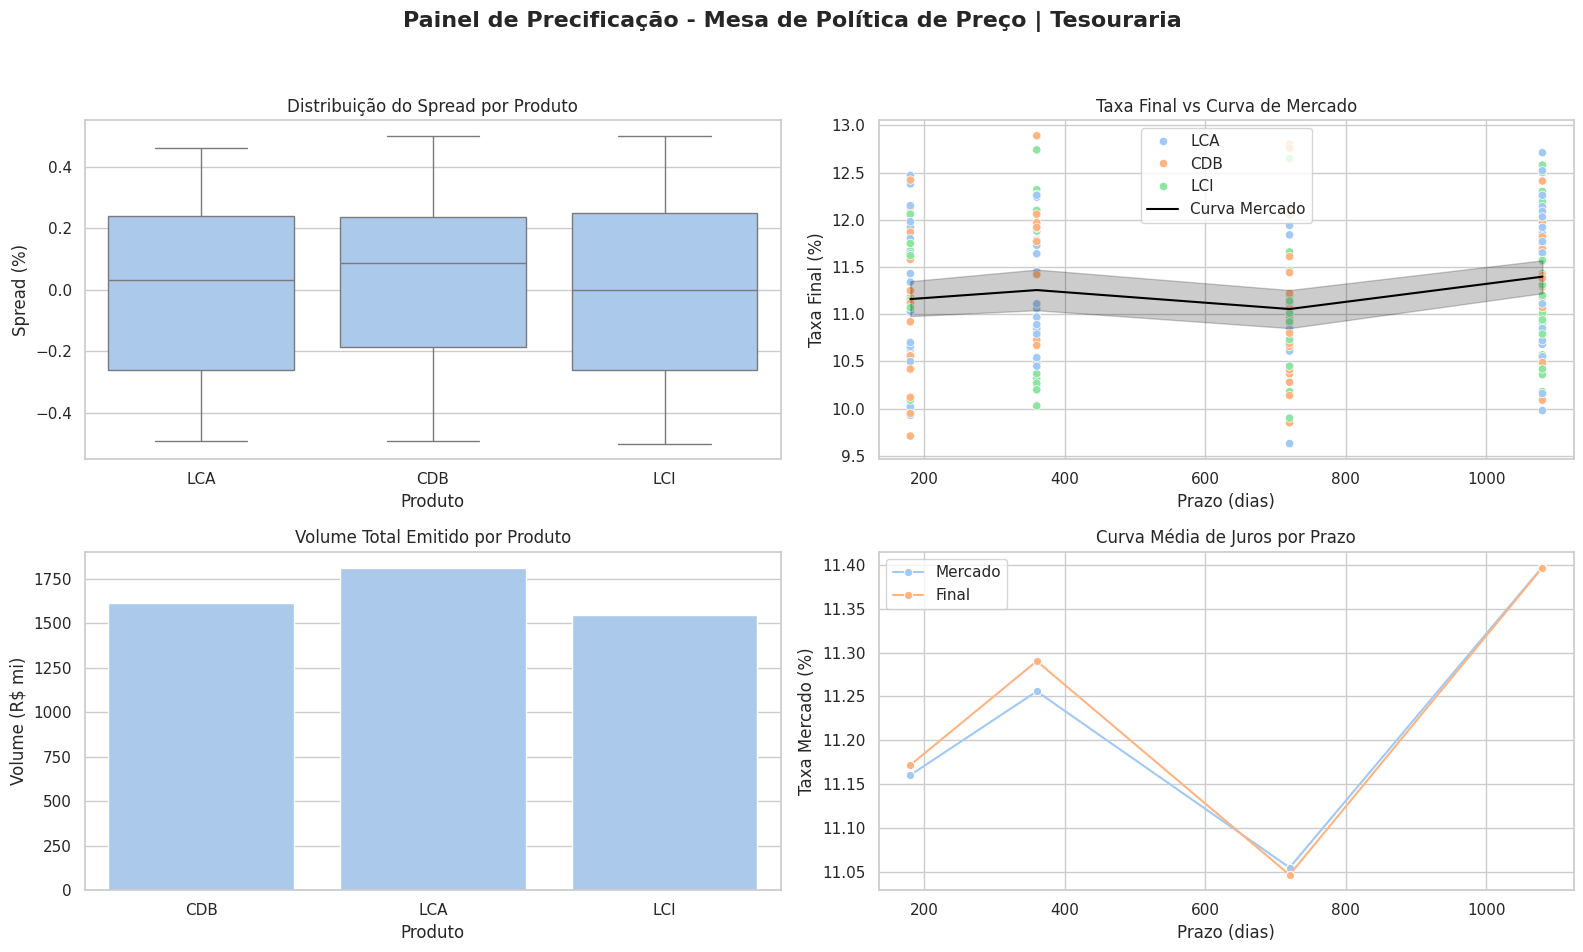

In [4]:
# Ajustando o estilo dos gráficos
sns.set(style="whitegrid", palette="pastel")

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Painel de Precificação - Mesa de Política de Preço | Tesouraria', fontsize=16, fontweight='bold')

# 1. Distribuição do spread por tipo de produto
sns.boxplot(x='Produto', y='Spread (%)', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Distribuição do Spread por Produto')

# 2. Taxa Final vs Mercado por Prazo
sns.scatterplot(data=df, x='Prazo (dias)', y='Taxa Final (%)', hue='Produto', ax=axs[0, 1])
sns.lineplot(data=df, x='Prazo (dias)', y='Taxa Mercado (%)', color='black', label='Curva Mercado', ax=axs[0, 1])
axs[0, 1].set_title('Taxa Final vs Curva de Mercado')

# 3. Volume por Produto
volume_produto = df.groupby('Produto')['Volume (R$ mi)'].sum().reset_index()
sns.barplot(data=volume_produto, x='Produto', y='Volume (R$ mi)', ax=axs[1, 0])
axs[1, 0].set_title('Volume Total Emitido por Produto')

# 4. Curva de juros média por prazo
media_curva = df.groupby('Prazo (dias)')[['Taxa Mercado (%)', 'Taxa Final (%)']].mean().reset_index()
sns.lineplot(data=media_curva, x='Prazo (dias)', y='Taxa Mercado (%)', marker='o', label='Mercado', ax=axs[1, 1])
sns.lineplot(data=media_curva, x='Prazo (dias)', y='Taxa Final (%)', marker='o', label='Final', ax=axs[1, 1])
axs[1, 1].set_title('Curva Média de Juros por Prazo')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
